<a href="https://colab.research.google.com/github/wa-le/Quantium-Forage-Virtual-Internship/blob/master/my_quantium_vi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Task Repository](https://https://github.com/wa-le/Quantium-Forage-Virtual-Internship)

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

EXAMINE THE
TRANSACTION DATA

In [2]:
# import and load the transaction dataset
transaction = pd.read_excel("/content/drive/MyDrive/Data/Quantium Forage/QVI_transaction_data.xlsx")
transaction

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [3]:
# making and using a copy of the dataset
df_transaction = transaction.copy()

In [4]:
# checking for null values in the transaction dataset
df_transaction.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

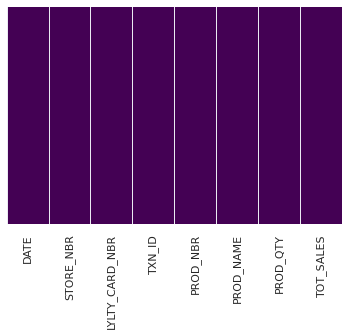

In [5]:
sns.heatmap(df_transaction.isnull(), yticklabels=False, cbar=False, cmap='viridis')
# shows there are no null values

In [6]:
# checking how many rows and columns the dataset contains
df_transaction.shape

(264836, 8)

In [7]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [8]:
# checking if the columns have the correct datatypes
df_transaction.dtypes

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object

In [9]:
# checking the amount of unique values in each column
df_transaction.nunique()

DATE                 364
STORE_NBR            272
LYLTY_CARD_NBR     72637
TXN_ID            263127
PROD_NBR             114
PROD_NAME            114
PROD_QTY               6
TOT_SALES            112
dtype: int64

In [10]:
# checking the amount of duplicate rows
df_transaction.duplicated(subset = None, keep = 'first').sum()


1

In [11]:
# we see that we have just one duplicated row
# then we can check the duplicated row
df_transaction[df_transaction.duplicated(subset = None, keep = 'first')]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
124845,43374,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0


In [12]:
# delete the duplicate rows
df_transaction.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=True)

In [13]:
df_transaction
# looking at the dataframe now, the single duplicate row has been removed

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264830,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264831,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264832,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264833,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [14]:
df_transaction.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264835.000000,264835.000000,2.648350e+05,2.648350e+05,264835.000000,264835.000000,264835.000000
mean,43464.036600,135.080216,1.355496e+05,1.351584e+05,56.583201,1.907308,7.304205
std,105.389336,76.784306,8.058011e+04,7.813316e+04,32.826692,0.643655,3.083231
min,43282.000000,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.000000,7.002100e+04,6.760100e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.000000,1.303580e+05,1.351380e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.000000,2.030945e+05,2.027015e+05,85.000000,2.000000,9.200000
max,43646.000000,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


EXAMINE THE CUSTOMER DATA

In [15]:
# # import and load the customer dataset
customer = pd.read_csv("/content/drive/MyDrive/Data/Quantium Forage/QVI_purchase_behaviour.csv")
customer

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [16]:
df_customer = customer.copy()

In [17]:
# check for null values in the dataset
df_customer.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

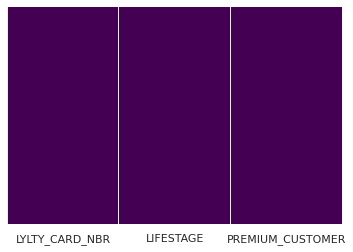

In [18]:
sns.heatmap(df_customer.isnull(), yticklabels=False, cbar=False, cmap='viridis')
# shows there are no null values

In [19]:
# check the amount of row and column in the dataframe
df_customer.shape

(72637, 3)

In [20]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [21]:
# checking if the columns have the correct datatypes
df_customer.dtypes

LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object

In [22]:
# checking the amount of unique values in each column
df_customer.nunique()

LYLTY_CARD_NBR      72637
LIFESTAGE               7
PREMIUM_CUSTOMER        3
dtype: int64

In [23]:
# checking the amount of duplicate rows in the dataframe
df_customer.duplicated(subset = None, keep = 'first').sum()
# we see that we have no duplicates in the dataset

0

In [24]:
df_customer.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


MERGING THE DATASET

In [25]:
df_merged = pd.merge(df_transaction, df_customer, on='LYLTY_CARD_NBR', how='left')
df_merged

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...
264830,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,YOUNG SINGLES/COUPLES,Premium
264831,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,YOUNG SINGLES/COUPLES,Premium
264832,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,YOUNG SINGLES/COUPLES,Premium
264833,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,YOUNG SINGLES/COUPLES,Premium


In [26]:
df_chips = df_merged.copy()

In [27]:
# check for null values
df_chips.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

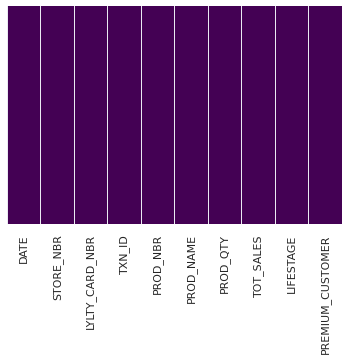

In [28]:
sns.heatmap(df_chips.isnull(), yticklabels=False, cbar=False, cmap='viridis')
# shows there are no null values

In [29]:
df_chips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264835 entries, 0 to 264834
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   DATE              264835 non-null  int64  
 1   STORE_NBR         264835 non-null  int64  
 2   LYLTY_CARD_NBR    264835 non-null  int64  
 3   TXN_ID            264835 non-null  int64  
 4   PROD_NBR          264835 non-null  int64  
 5   PROD_NAME         264835 non-null  object 
 6   PROD_QTY          264835 non-null  int64  
 7   TOT_SALES         264835 non-null  float64
 8   LIFESTAGE         264835 non-null  object 
 9   PREMIUM_CUSTOMER  264835 non-null  object 
dtypes: float64(1), int64(6), object(3)
memory usage: 22.2+ MB


In [130]:
# derive "PACK_SIZE" column using the "PROD_NAME" column
pack_sizes = []
for j in df_chips["PROD_NAME"]:
  if any(map(str.isdigit, j.split(" ")[-1])):
    size = j.split(" ")[-1][-4:-1]
    pack_sizes.append(size)
  else:
    size = j.split(" ")[1][:-1]
    pack_sizes.append(size)

pack_sizes_gr = [f"{each}g" for each in pack_sizes]

df_chips["PACK_SIZE"] = pack_sizes_gr

In [164]:
# derive Brand Name from Prod_name
len(df_chips["PROD_NAME"].value_counts().values)

114

In [166]:
df_chips["PROD_NAME"].value_counts().index

Index(['Kettle Mozzarella   Basil & Pesto 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Cobs Popd Swt/Chlli &Sr/Cream Chips 110g',
       'Tyrrells Crisps     Ched & Chives 165g',
       'Cobs Popd Sea Salt  Chips 110g', 'Kettle 135g Swt Pot Sea Salt',
       'Tostitos Splash Of  Lime 175g',
       'Infuzions Thai SweetChili PotatoMix 110g',
       'Smiths Crnkle Chip  Orgnl Big Bag 380g',
       'Thins Potato Chips  Hot & Spicy 175g',
       ...
       'Thins Chips         Originl saltd 175g',
       'Smiths Chip Thinly  CutSalt/Vinegr175g',
       'Smiths Crinkle Cut  French OnionDip 150g',
       'Red Rock Deli Chikn&Garlic Aioli 150g',
       'Sunbites Whlegrn    Crisps Frch/Onin 90g', 'RRD Pc Sea Salt     165g',
       'Woolworths Medium   Salsa 300g',
       'NCC Sour Cream &    Garden Chives 175g',
       'French Fries Potato Chips 175g', 'WW Crinkle Cut      Original 175g'],
      dtype='object', length=114)

In [165]:
df_chips["PROD_NAME"].value_counts().values

array([3304, 3296, 3269, 3268, 3265, 3257, 3252, 3242, 3233, 3229, 3219,
       3217, 3210, 3204, 3200, 3197, 3188, 3185, 3177, 3174, 3174, 3173,
       3172, 3170, 3169, 3167, 3162, 3160, 3159, 3159, 3157, 3149, 3148,
       3146, 3145, 3144, 3142, 3138, 3134, 3127, 3125, 3121, 3115, 3115,
       3114, 3114, 3114, 3105, 3104, 3103, 3095, 3085, 3083, 3083, 3074,
       3052, 3038, 1614, 1576, 1572, 1564, 1550, 1539, 1526, 1518, 1516,
       1516, 1514, 1513, 1512, 1509, 1507, 1506, 1503, 1498, 1498, 1495,
       1495, 1491, 1489, 1487, 1484, 1483, 1481, 1479, 1474, 1473, 1473,
       1472, 1470, 1469, 1468, 1468, 1467, 1461, 1461, 1460, 1458, 1455,
       1455, 1454, 1451, 1449, 1448, 1441, 1440, 1438, 1434, 1432, 1431,
       1430, 1419, 1418, 1410])

In [236]:
# derive "BRAND_NAME" column from the "PROD_NAME" column
df_chips["PROD_NAME"].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

In [237]:
# Create a list of chip brand names
# looking at the dataset critically, we seem to have 21 unique Brand Names
chip_brands = ['Natural Chip CO.', 'Ccs', 'Smiths', 'Kettle', 'Old El Paso', 'Grain Waves', 'Doritos', 'Twisties', 'Thins', 'Burger Rings', 'Cheezels',
               'Infuzions', 'Red Rock Deli', 'Pringles', 'Tyrrells', 'Woolworths', 'Cobs', 'French Fries', 'Tostitos', 'Sunbites', 'Cheetos']
if len(set(chip_brands)) == len(chip_brands):
  print("Unique")

Unique


In [238]:
# actual creation of the BRAND_NAME column + cleaning

brand_list = []

for each in df_chips['PROD_NAME']:
  if each.split(" ")[0] == "Infzns":
    brand_list.append("Infuzions")
  elif each.split(" ")[0] == "GrnWves" or each.split(" ")[0] == "Grain":
    brand_list.append("Grain Waves")
  elif each.split(" ")[0] == "RRD" or each.split(" ")[0] == "Red":
    brand_list.append("Red Rock Deli")
  elif each.split(" ")[0] == "WW":
    brand_list.append("Woolworths")
  elif each.split(" ")[0] == "Snbts":
    brand_list.append("Sunbites")
  elif each.split(" ")[0] == "Natural":
    brand_list.append("Natural Chip Co")
  elif each.split(" ")[0] == "Burger":
    brand_list.append("Burger Rings")
  elif each.split(" ")[0] == "NCC":
    brand_list.append("Natural Chip Co")
  elif each.split(" ")[0] == "Old":
    brand_list.append("Old El Paso")
  elif each.split(" ")[0] == "French":
    brand_list.append("French Fries")
  elif each.split(" ")[0] == "Smith":
    brand_list.append("Smiths")
  elif each.split(" ")[0] == "Dorito":
    brand_list.append("Doritos")
  else:
    brand_list.append(each.split(" ")[0])

df_chips["BRAND_NAME"] = brand_list


In [239]:
df_chips

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,PACK_SIZE,BRAND_NAME
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,175g,Natural Chip Co
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,175g,CCs
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,170g,Smiths
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget,175g,Smiths
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget,150g,Kettle
...,...,...,...,...,...,...,...,...,...,...,...,...
264830,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,YOUNG SINGLES/COUPLES,Premium,175g,Kettle
264831,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,YOUNG SINGLES/COUPLES,Premium,175g,Tostitos
264832,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,YOUNG SINGLES/COUPLES,Premium,170g,Doritos
264833,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,YOUNG SINGLES/COUPLES,Premium,150g,Doritos


In [240]:
df_chips['BRAND_NAME'].value_counts()

Kettle             41288
Smiths             31822
Doritos            28147
Pringles           25102
Red Rock Deli      17779
Woolworths         14757
Infuzions          14201
Thins              14075
Cobs                9693
Tostitos            9471
Twisties            9454
Old El Paso         9324
Grain Waves         7740
Natural Chip Co     7469
Tyrrells            6442
Cheezels            4603
CCs                 4551
Sunbites            3008
Cheetos             2927
Burger Rings        1564
French Fries        1418
Name: BRAND_NAME, dtype: int64

In [241]:
# 21 total unique Brand names
len(df_chips['BRAND_NAME'].value_counts())

21

In [269]:
# From above, we see that we have 2 outliers and the transaction was made by the same person
# Now we remove the outliers with the following steps

# df_chips.sort_values(by="TOT_SALES", ascending=False).head()
df_chips.sort_values(by="PROD_QTY", ascending=False).head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,PACK_SIZE,BRAND_NAME
69762,43331,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,OLDER FAMILIES,Premium,380g,Doritos
69763,43605,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,OLDER FAMILIES,Premium,380g,Doritos
204366,43327,223,223025,223075,8,Smiths Crinkle Cut Chips Original 170g,5,14.5,YOUNG FAMILIES,Mainstream,170g,Smiths
55501,43602,164,164072,164241,36,Kettle Chilli 175g,5,27.0,OLDER FAMILIES,Mainstream,175g,Kettle
69815,43326,257,257208,257019,45,Smiths Thinly Cut Roast Chicken 175g,5,15.0,OLDER FAMILIES,Premium,175g,Smiths


In [275]:
df_chips.drop(df_chips[df_chips['PROD_QTY'] == 200].index, inplace = True)

In [278]:
df_chips = df_chips.reset_index()
df_chips

,index,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,PACK_SIZE,BRAND_NAME
0,0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,175g,Natural Chip Co
1,1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,175g,CCs
2,2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,170g,Smiths
3,3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget,175g,Smiths
4,4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget,150g,Kettle
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264828,264830,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,YOUNG SINGLES/COUPLES,Premium,175g,Kettle
264829,264831,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,YOUNG SINGLES/COUPLES,Premium,175g,Tostitos
264830,264832,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,YOUNG SINGLES/COUPLES,Premium,170g,Doritos
264831,264833,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,YOUNG SINGLES/COUPLES,Premium,150g,Doritos


### **WE START ANALYZING THE DATASET**










In [279]:
df_chips.columns

Index(['index', 'DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'LIFESTAGE', 'PREMIUM_CUSTOMER',
       'PACK_SIZE', 'BRAND_NAME'],
      dtype='object')

In [282]:
# getting a dataframe that contains each unique packsize and total amount sold
chips_packs_sold = df_chips.groupby(['PACK_SIZE']).size().reset_index().rename(columns={0:'AMOUNT_SOLD'})
chips_packs_sold

,PACK_SIZE,AMOUNT_SOLD
0,110g,22387
1,125g,1454
2,134g,25102
3,135g,3257
4,150g,43131
5,160g,2970
6,165g,15297
7,170g,19983
8,175g,66389
9,180g,1468


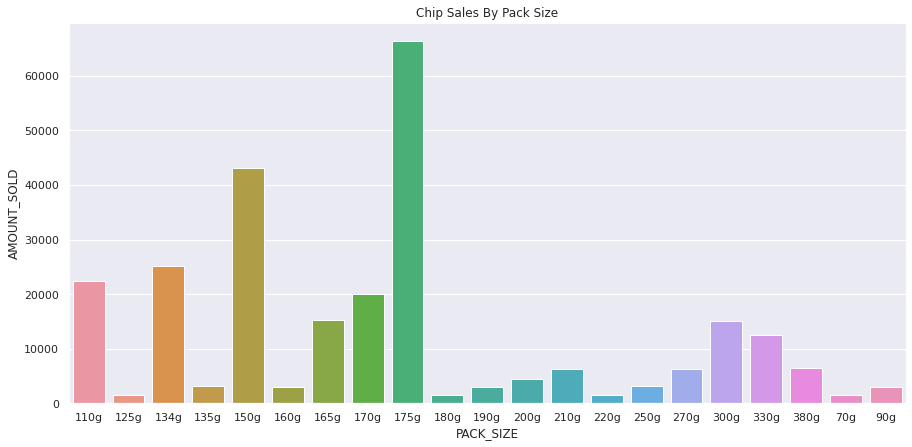

In [283]:
plt.rcParams['figure.figsize'] = (15, 7)
sns.barplot(x="PACK_SIZE", y='AMOUNT_SOLD', data=chips_packs_sold).set(title='Chip Sales By Pack Size')
plt.show()

OBSERVATION:
We observe from above that chips of pack size 175g were the highest bought by customers. Followed by chips of pack size 150g, 134g, 110g and 170g